# Image processing Task

## Task 1 - NumPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.rcParams['figure.figsize'] = [10, 3]

In [5]:
img = np.zeros((300,300), dtype=np.uint8)
print(img)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


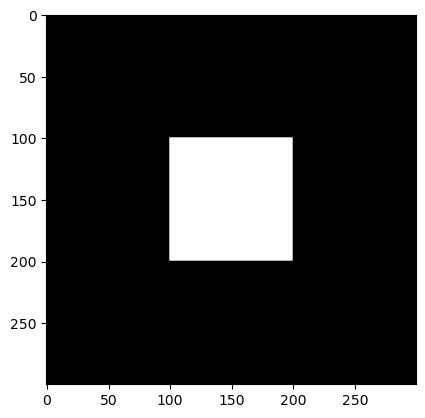

In [6]:
img[100:200, 100:200] = 255
plt.imshow(img, cmap='gray')
plt.show()

## Task 2 - Image concatenation

In [2]:
image1 = cv2.imread('./task-assets/concat1.jpg',0)
image2 = cv2.imread('./task-assets/concat2.jpg',0)
image3 = cv2.imread('./task-assets/concat3.jpg',0)


[[189 189 189 ... 195 195 195]
 [189 189 189 ... 195 195 195]
 [189 189 189 ... 195 195 195]
 ...
 [115 115 115 ... 121 121 121]
 [114 114 114 ... 120 120 120]
 [114 114 114 ... 119 119 119]]


In [3]:
cv2.imshow('image1', image1)
cv2.imshow('image2', image2)
cv2.imshow('image3', image3)
cv2.waitKey(0)
cv2.destroyAllWindows()